### 1. Process Data

In [14]:
import pandas as pd
from sklearn import tree
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# put data into dataframe
df = pd.read_csv("cancer.csv")

df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,M,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,F,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,M,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,F,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0


In [3]:
pure_df = df.copy()

# create label encoder to make strings into categorized numericals
le = LabelEncoder()

# list of columns needed to be encoded
le_cols = ["GENDER"]

# encode every listed column
for column in df.columns:
    if column in le_cols:
        le.fit(df[column])
        df[column] = le.transform(df[column])


df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0


In [4]:
# split data
X_train, X_test, y_train, y_test = train_test_split(df.drop(["LUNG_CANCER"], axis=1), df["LUNG_CANCER"], test_size=0.2)

# normalize features
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### 2. Create Model

In [5]:
clf = tree.DecisionTreeClassifier()

### 3. Train Model

[Text(0.643939,0.954545,'x[8] <= -0.168\ngini = 0.226\nsamples = 247\nvalue = [32, 215]'),
 Text(0.439394,0.863636,'x[13] <= 0.077\ngini = 0.387\nsamples = 103\nvalue = [27, 76]'),
 Text(0.541667,0.909091,'True  '),
 Text(0.242424,0.772727,'x[7] <= -0.386\ngini = 0.497\nsamples = 50\nvalue = [23, 27]'),
 Text(0.121212,0.681818,'x[0] <= -0.045\ngini = 0.43\nsamples = 16\nvalue = [11, 5]'),
 Text(0.0606061,0.590909,'x[1] <= -1.14\ngini = 0.219\nsamples = 8\nvalue = [7, 1]'),
 Text(0.030303,0.5,'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.0909091,0.5,'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.181818,0.590909,'x[3] <= -0.152\ngini = 0.5\nsamples = 8\nvalue = [4, 4]'),
 Text(0.151515,0.5,'x[1] <= -0.37\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.121212,0.409091,'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.181818,0.409091,'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.212121,0.5,'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.363636,0.681818,'x[3] <= 

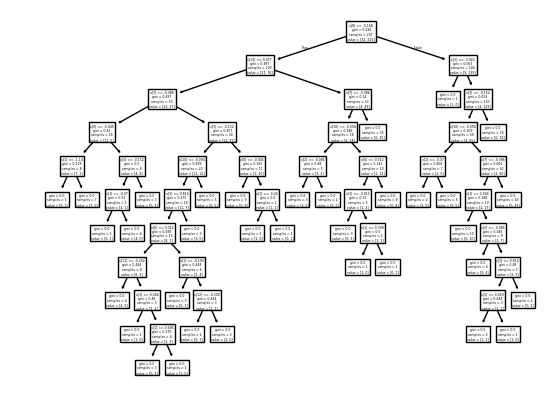

In [8]:
clf = clf.fit(X_train, y_train)

tree.plot_tree(clf)

### 4. Evaluate Model

Average = 0, High = 1, Low = 2

In [9]:
accuracy_score(y_test, clf.predict(X_test))

0.9032258064516129

In [11]:
clf.predict(X_test[:10]), y_test[:10]

(array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1], dtype=int64),
 305    1
 306    1
 44     1
 192    1
 48     1
 245    0
 232    1
 95     1
 32     0
 237    1
 Name: LUNG_CANCER, dtype: int64)

In [13]:
confusion_matrix(y_test, clf.predict(X_test))

array([[ 4,  3],
       [ 3, 52]], dtype=int64)

In [16]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.57      0.57      0.57         7
           1       0.95      0.95      0.95        55

    accuracy                           0.90        62
   macro avg       0.76      0.76      0.76        62
weighted avg       0.90      0.90      0.90        62



Bad at predicting positive cancer (bad classification for TP and FP). So dangerous model for someone who might actually have cancer.